<a href="https://colab.research.google.com/github/vagelious/binary_text_classification/blob/main/simple_transformers_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Pre proc

In [3]:
!pip install simpletransformers

     |████████████████████████████████| 215kB 2.7MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 2.9MB 6.8MB/s 
     |████████████████████████████████| 1.7MB 29.0MB/s 
     |████████████████████████████████| 7.4MB 18.3MB/s 
     |████████████████████████████████| 317kB 39.7MB/s 
     |████████████████████████████████| 1.1MB 39.6MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 122kB 40.4MB/s 
     |████████████████████████████████| 163kB 35.5MB/s 
     |████████████████████████████████| 102kB 11.0MB/s 
     |████████████████████████████████| 102kB 11.0MB/s 
     |████████████████████████████████| 133kB 41.5MB/s 
     |████████████████████████████████| 4.4MB 35.7MB/s 
     |████████████████████████████████| 112kB 36.9MB/s 
     |████████████████████████████████| 6.7MB 36.8MB/s 
     |████████████████████████████████| 890kB 40.6MB/s 
     |████████████████████████████████| 1.1MB 40.6MB/s

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

from simpletransformers.classification import ClassificationModel
import pandas as pd
import logging

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [6]:
path_root = "/content/drive/My Drive/reviews_ml/v2/English/"
revs_preprocessed = pd.read_csv(path_root + "augmented_data_english.csv") 
revs_preprocessed = revs_preprocessed.dropna()
revs_preprocessed['TranslatedReview'] = revs_preprocessed['TranslatedReview'].astype(str)
revs_preprocessed.sample(5)


,TranslatedReview,Approved
61790,I do not want to leave a comment but I will wr...,0
122316,Very good I had no problems,1
19722,An excellent doctor. He showed deep knowledge ...,1
39835,Very scholastic in learning the cause of my ov...,1
59258,"Courtesy, interest and safety!",1


In [7]:
revs_preprocessed.Approved.value_counts()

1                                      123099
0                                        8472
 dkgn                                       1
 Do not look for it better this was         1
 What else should one write?                1
)                                           1
Name: Approved, dtype: int64

In [8]:
revs = revs_preprocessed

revs0 = revs[(revs.Approved == "0")]
revs1 = revs[(revs.Approved == "1")]
revs = pd.concat([revs0, revs1], ignore_index=True).sample(frac=1)
revs.Approved = revs.Approved.astype(int)

revs.Approved.value_counts()

1    123099
0      8472
Name: Approved, dtype: int64

In [9]:
import numpy as np
r_train, r_validate, r_test = np.split(revs.sample(frac=1), [int(.6*len(revs)), int(.8*len(revs))])

In [15]:
from simpletransformers.classification import ClassificationModel
import pandas as pd
import logging
import torch
import sklearn


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Train and Evaluation data needs to be in a Pandas Dataframe of two columns. The first column is the text with type str, and the second column is the label with type int.
train_data = r_train
train_df = pd.DataFrame(train_data)

eval_data = r_validate
eval_df = pd.DataFrame(eval_data)
two_epochs_model_path = path_root+"savedModel_Roberta_2epochs"
model_path = path_root+"savedModel_Roberta"


####Args

In [ ]:
//default simple transformers params
self.args = {
   'model_type':  'roberta',
   'model_name': 'roberta-base',
   'output_dir': 'outputs/',
   'cache_dir': 'cache/',
   'fp16': True,
   'fp16_opt_level': 'O1',
   'max_seq_length': 128,
   'train_batch_size': 8,
   'eval_batch_size': 8,
   'gradient_accumulation_steps': 1,
   'num_train_epochs': 1,
   'weight_decay': 0,
   'learning_rate': 4e-5,
   'adam_epsilon': 1e-8,
   'warmup_ratio': 0.06,
   'warmup_steps': 0,
   'max_grad_norm': 1.0,
   'logging_steps': 50,
   'evaluate_during_training': False,
   'save_steps': 2000,
   'eval_all_checkpoints': True,
   'use_tensorboard': True,
   'overwrite_output_dir': False,
   'reprocess_input_data': False,
}


#Model

## 1 epoch


In [ ]:
# Create a TransformerModel
train_args={
    'overwrite_output_dir': True
}

# Create a ClassificationModel
model = ClassificationModel('roberta', 'roberta-base',args=train_args)

# Train the model
model.train_model(train_df)

torch.save(model, model_path )

## 2 epochs

In [9]:
# Create a TransformerModel
train_args2={
    'overwrite_output_dir': True,
    'num_train_epochs': 2
}

# Create a ClassificationModel
model2 = ClassificationModel('roberta', 'roberta-base',args=train_args2)

# Train the model
model2.train_model(train_df)
torch.save(model2, two_epochs_model_path )


INFO:filelock:Lock 140246981895224 acquired on /root/.cache/torch/transformers/e1a2a406b5a05063c31f4dfdee7608986ba7c6393f7f79db5e69dcd197208534.117c81977c5979de8c088352e74ec6e70f5c66096c28b61d3c50101609b39690.lock


INFO:filelock:Lock 140246981895224 released on /root/.cache/torch/transformers/e1a2a406b5a05063c31f4dfdee7608986ba7c6393f7f79db5e69dcd197208534.117c81977c5979de8c088352e74ec6e70f5c66096c28b61d3c50101609b39690.lock


INFO:filelock:Lock 140245694265832 acquired on /root/.cache/torch/transformers/80b4a484eddeb259bec2f06a6f2f05d90934111628e0e1c09a33bd4a121358e1.49b88ba7ec2c26a7558dda98ca3884c3b80fa31cf43a1b1f23aef3ff81ba344e.lock


INFO:filelock:Lock 140245694265832 released on /root/.cache/torch/transformers/80b4a484eddeb259bec2f06a6f2f05d90934111628e0e1c09a33bd4a121358e1.49b88ba7ec2c26a7558dda98ca3884c3b80fa31cf43a1b1f23aef3ff81ba344e.lock


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

INFO:filelock:Lock 140245694267064 released on /root/.cache/torch/transformers/d0c5776499adc1ded22493fae699da0971c1ee4c2587111707a4d177d20257a2.ef00af9e673c7160b4d41cfda1f48c5f4cba57d5142754525572a846a1ab1b9b.lock


INFO:filelock:Lock 140245694267064 acquired on /root/.cache/torch/transformers/b35e7cd126cd4229a746b5d5c29a749e8e84438b14bcdb575950584fe33207e8.70bec105b4158ed9a1747fea67a43f5dee97855c64d62b6ec3742f4cfdb5feda.lock


INFO:filelock:Lock 140245694267064 released on /root/.cache/torch/transformers/b35e7cd126cd4229a746b5d5c29a749e8e84438b14bcdb575950584fe33207e8.70bec105b4158ed9a1747fea67a43f5dee97855c64d62b6ec3742f4cfdb5feda.lock


/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:353: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.


In [ ]:
model = torch.load(model_path)
result, model_outputs, wrong_predictions = model.eval_model(eval_df, acc=sklearn.metrics.accuracy_score)

In [29]:
model2 = torch.load(two_epochs_model_path)
result2, model_outputs2, wrong_predictions2 = model2.eval_model(eval_df, acc=sklearn.metrics.accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:851: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_model:{'mcc': 0.6842458250896754, 'tp': 24330, 'tn': 1068, 'fp': 586, 'fn': 330, 'acc': 0.9651896328950369, 'eval_loss': 0.13361417918224}


#Predict

##Random manual testing

In [ ]:
predictions, raw_outputs = model.predict(['you are a fucking asshole ', 'the doctor was really good',' dsf', ' dfjdnf@fdfg.gr 29954954', 'he charged me 10000 euros for bullshit' ])
predictions

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


array([0, 1, 0, 0, 0])

In [ ]:
r_test.head()

,TranslatedReview,Approved
32589,Consistent and meticulous doctor. It inspired ...,1
55954,Consistent,1
90859,The best for the first visit and contact of a ...,1
131350,flawless !!!,1
116426,I visited her for the first time and I was happy.,1


In [ ]:
r_test.Approved.value_counts()

1    24571
0     1744
Name: Approved, dtype: int64

In [ ]:
r_test.TranslatedReview.values

array(['Consistent and meticulous doctor. It inspired me to trust. I highly recommend it.',
       'Consistent',
       'The best for the first visit and contact of a doctor with a child. My little one who does not get along well with the doctors felt very comfortable and trusted him. Congratulations !!!!',
       ..., 'I highly recommend him !!!!',
       'An excellent doctor, he respects your problem and really listens to the patient. It exudes security and confidence. Very good at his job and I would highly recommend him !!!',
       'Remarkable scientist with excellent knowledge of the subject and friendly mood. The program he proposes is based on and fully adapted to your data without feeling like you are on a diet. I would highly recommend him.'],
      dtype=object)

##Test dataset

In [18]:
y_test = r_test.TranslatedReview.values

predictions2,raw2 = model.predict(y_test)
predictions2epochs, raw2epochs = model2.predict(y_test)

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


In [21]:
y_values = r_test.Approved.values

##Results 1 epoch

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [ ]:
conf_mat = confusion_matrix(y_true=y_values,
                            y_pred=predictions2)
conf_mat

array([[ 1084,   660],
       [  354, 24217]])

In [ ]:
conf_mat = confusion_matrix(y_true=y_values,
                            y_pred=predictions2epochs)
conf_mat

In [24]:
import matplotlib.pyplot as plt

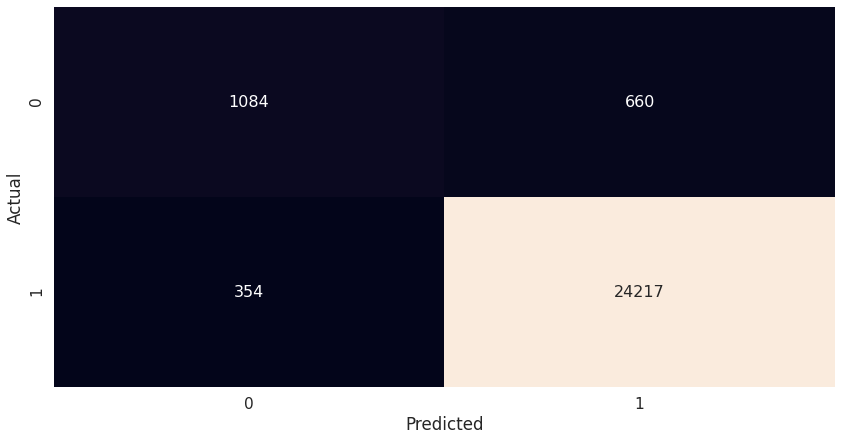

In [ ]:


array_final = conf_mat
x_axis = ['0','1']
cm = pd.DataFrame(array_final)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize=(14,7))

sns.set(font_scale=1.4)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=x_axis, cbar=False, fmt='d',annot=True, annot_kws={"size":16})

In [ ]:
print(classification_report(y_true=y_values,
                            y_pred=predictions2))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68      1744
           1       0.97      0.99      0.98     24571

    accuracy                           0.96     26315
   macro avg       0.86      0.80      0.83     26315
weighted avg       0.96      0.96      0.96     26315



##Results 2 epochs

In [25]:
conf_mat2 = confusion_matrix(y_true=y_values,
                            y_pred=predictions2epochs)
conf_mat2

array([[ 1138,   549],
       [  274, 24354]])

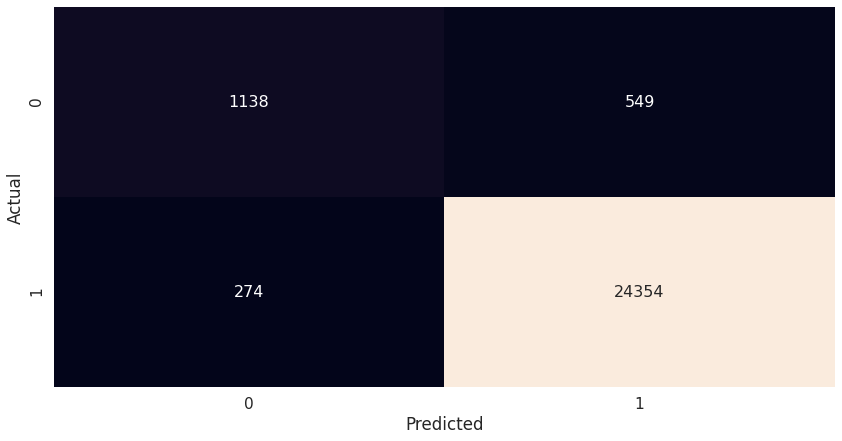

In [28]:


array_final = conf_mat2
x_axis = ['0','1']
cm = pd.DataFrame(array_final)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize=(14,7))

sns.set(font_scale=1.4)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=x_axis, cbar=False, fmt='d',annot=True, annot_kws={"size":16})

In [22]:

print(classification_report(y_true=y_values,
                            y_pred=predictions2epochs))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1687
           1       0.98      0.99      0.98     24628

    accuracy                           0.97     26315
   macro avg       0.89      0.83      0.86     26315
weighted avg       0.97      0.97      0.97     26315

